In [23]:
import pandas as pd
import matplotlib.pyplot as plt

#A continuación se crea la variable que guardará la dirección del dataset. 
#La misma se encuentra almacenada en Github

url_Global_fire = 'https://raw.githubusercontent.com/francolange00/CoderHouse_Data_Science/main/Leo_Satellite_Global%20_Fire-Dataset.csv'

#Se crea el dataframe para el dataset:
df_Global_fire = pd.read_csv(url_Global_fire, index_col=0).reset_index()



#Se extraen las coordenadas del datafreme
latitude_list = df_Global_fire[['latitude']].values.tolist()
longitude_list = df_Global_fire[['longitude']].values.tolist()

df_Global_fire.head(10)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,37.7296,34.8998,303.3,1.9,1.3,2021-01-01,903,Terra,MODIS,56,6.03,279.3,20.1,D,0
1,37.7343,34.8774,306.7,1.9,1.3,2021-01-01,903,Terra,MODIS,64,6.03,276.7,24.9,D,0
2,37.8685,29.0728,300.5,1.0,1.0,2021-01-01,903,Terra,MODIS,38,6.03,286.0,5.0,D,0
3,37.7362,34.8945,310.3,1.9,1.3,2021-01-01,903,Terra,MODIS,70,6.03,278.8,28.8,D,0
4,37.1456,40.4709,308.9,1.2,1.1,2021-01-01,1041,Aqua,MODIS,54,6.03,291.1,9.0,D,0
5,37.1231,42.4012,309.4,1.5,1.2,2021-01-01,1041,Aqua,MODIS,68,6.03,294.9,13.7,D,0
6,36.9835,40.1958,324.6,1.2,1.1,2021-01-01,1041,Aqua,MODIS,83,6.03,291.7,27.3,D,0
7,37.0970,40.6650,309.8,1.2,1.1,2021-01-01,1041,Aqua,MODIS,69,6.03,293.9,9.3,D,0
8,37.1549,40.2119,322.2,1.2,1.1,2021-01-01,1041,Aqua,MODIS,82,6.03,293.3,22.2,D,0
9,37.0423,40.5362,306.9,1.2,1.1,2021-01-01,1041,Aqua,MODIS,61,6.03,290.9,7.7,D,0


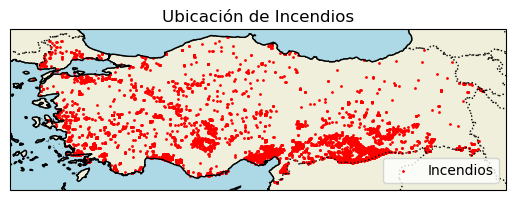

In [35]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Se crea una figura y un eje con proyección geográfica
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Se agregan características geográficas como países y costas
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Se convierten coordenadas de latitud y longitud a coordenadas del mapa
x, y = longitude_list, latitude_list

# Se superponen los puntos de incendio en el mapa
ax.scatter(x, y, c='red', s=1, marker='o', label='Incendios')

# Se agrega título y leyenda
plt.title('Ubicación de Incendios')
plt.legend()

# Se muestra el mapa
plt.show()

In [ ]:
#Aqui se puede observar claramente que los datos obtenidos del dataset corresponden a la región de turquía

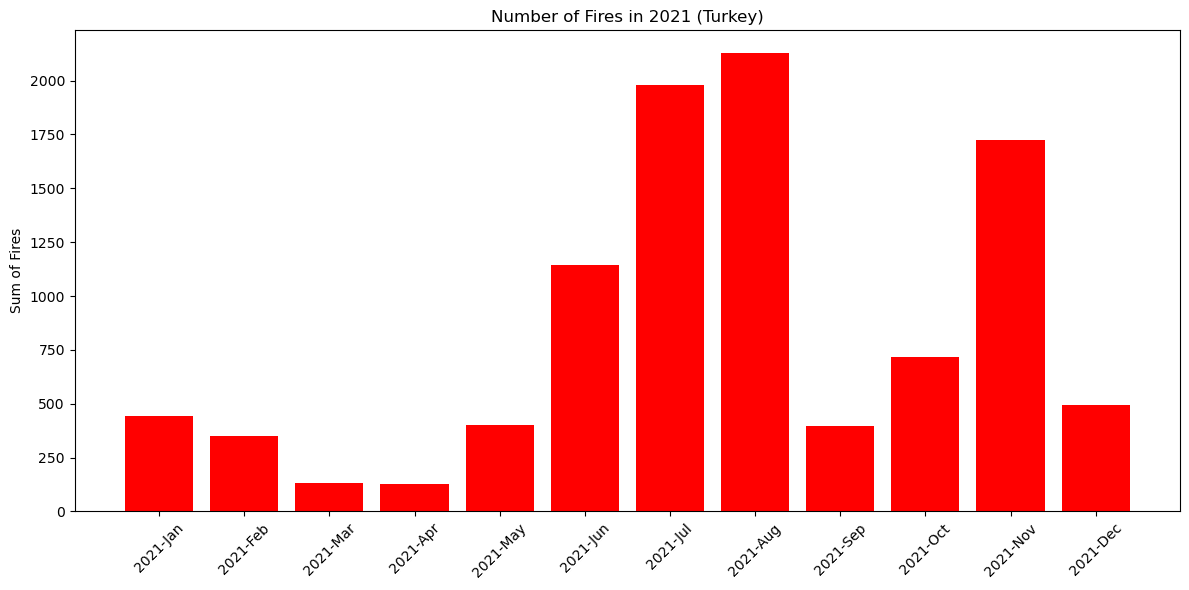

In [47]:
import calendar

df_Global_fire['acq_date'] = pd.to_datetime(df_Global_fire['acq_date'])

df_Global_fire['month'] = df_Global_fire['acq_date'].dt.month
df_Global_fire['year'] = df_Global_fire['acq_date'].dt.year

#Se agrupa y cuentan los incendios por año y mes
Fires_sum = df_Global_fire.groupby(['year', 'month']).size().reset_index(name='count')

#Se mapea los números de mes a nombres de mes
Fires_sum['month'] = Fires_sum['month'].apply(lambda x: calendar.month_abbr[x])

#Se Crea una gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(Fires_sum['year'].astype(str) + '-' + Fires_sum['month'], Fires_sum['count'], color='r')
plt.ylabel('Sum of Fires')
plt.title('Number of Fires in 2021 (Turkey)')
plt.xticks(rotation=45)

# Se muestra la gráfica
plt.tight_layout()
plt.show()


In [ ]:
#Aqui podemos ver que el mayor número de incendios se corresponde entre los meses junio y agosto (verano), 
#con un incremento notable en el mes de noviembre

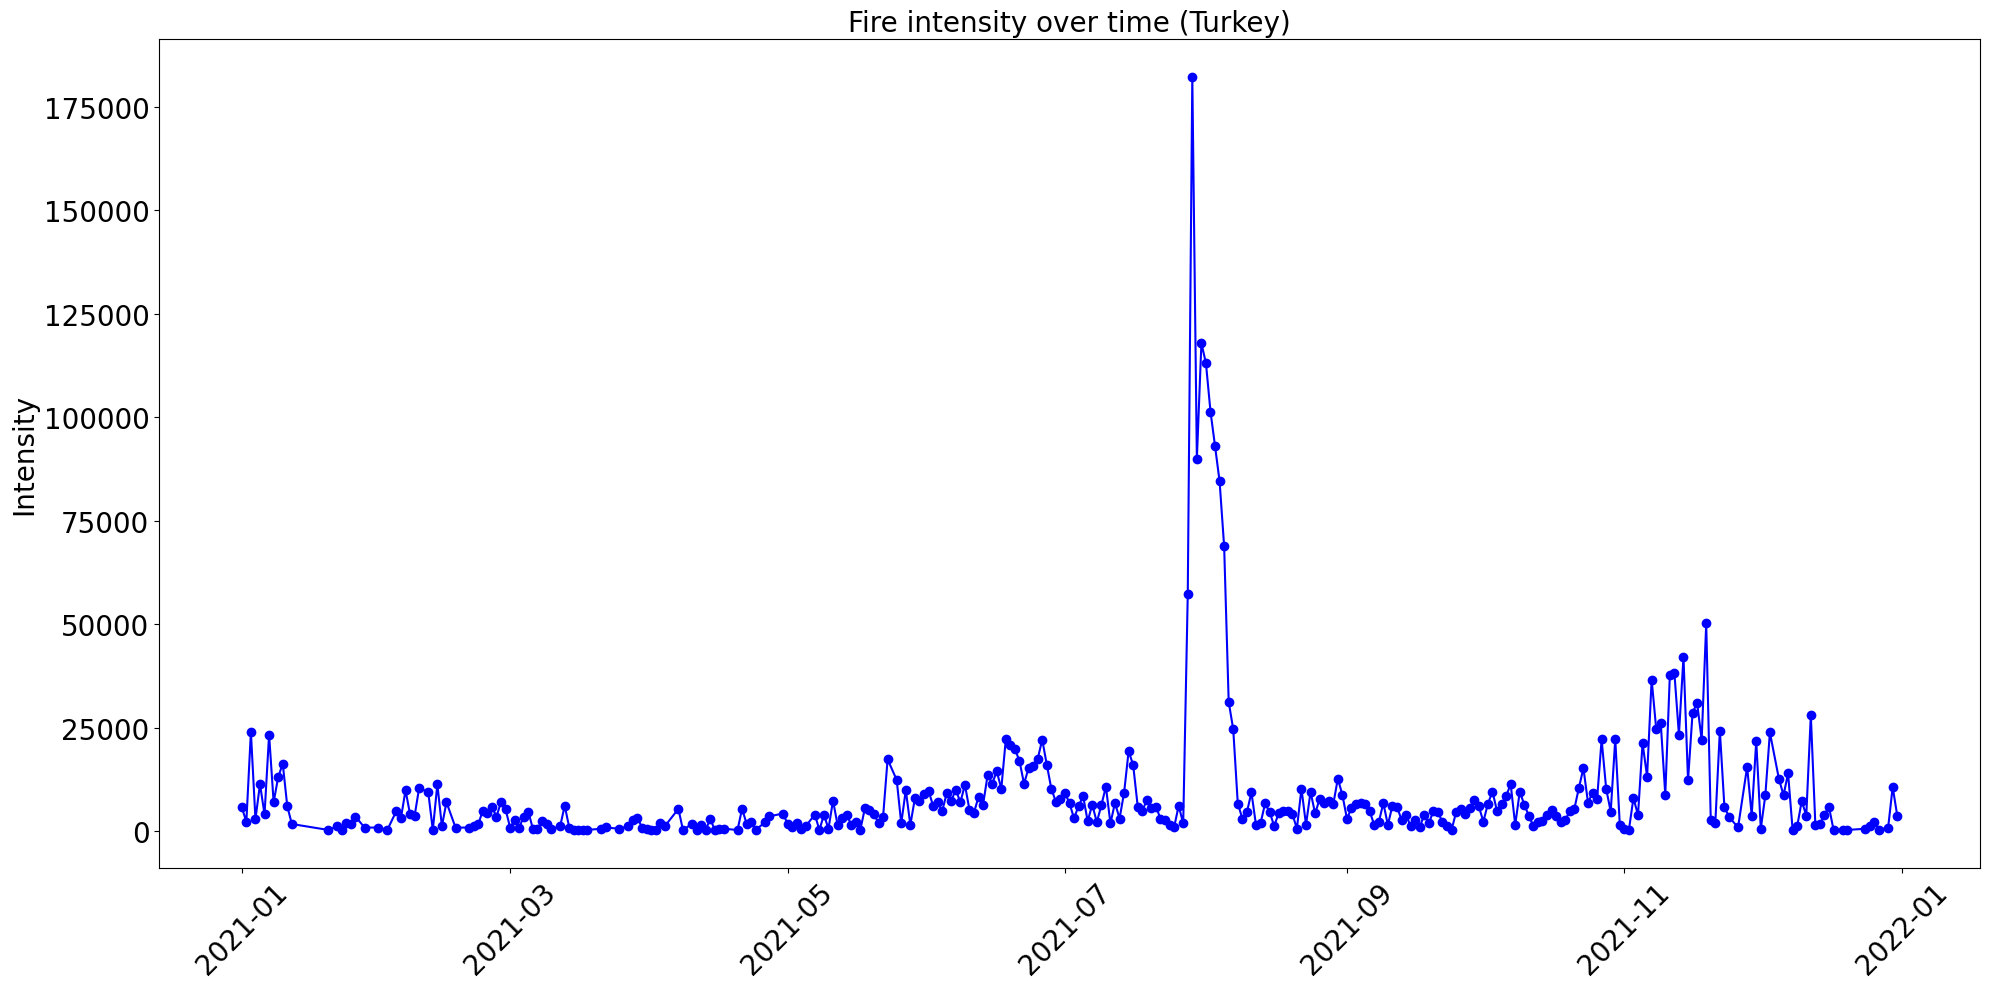

In [37]:
# Se calcula la suma diaria de intensidad
bright_sum = df_Global_fire.groupby('acq_date')['bright_t31'].sum()

# Se crea una figura y ejes para el gráfico de línea
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Se crea el gráfico de línea de la suma diaria de intensidad
plt.plot(bright_sum.index, bright_sum.values, marker='o', linestyle='-', color='blue', label='Suma Diaria de Intensidad')

# Se personaliza el título y etiquetas de los ejes
plt.title('Fire intensity over time (Turkey)',fontsize =20)
plt.ylabel('Intensity', fontsize =20)
plt.yticks(fontsize =20)
plt.xticks(rotation=45, fontsize =20)


# Se muestra el gráfico de línea
plt.tight_layout()
plt.show()

In [ ]:
#Aqui se puede ver que existe una correlación entre el número de incendios con la intensidad de los mismos, tal y como 
#es de esperar,con un pico máximo en agosto

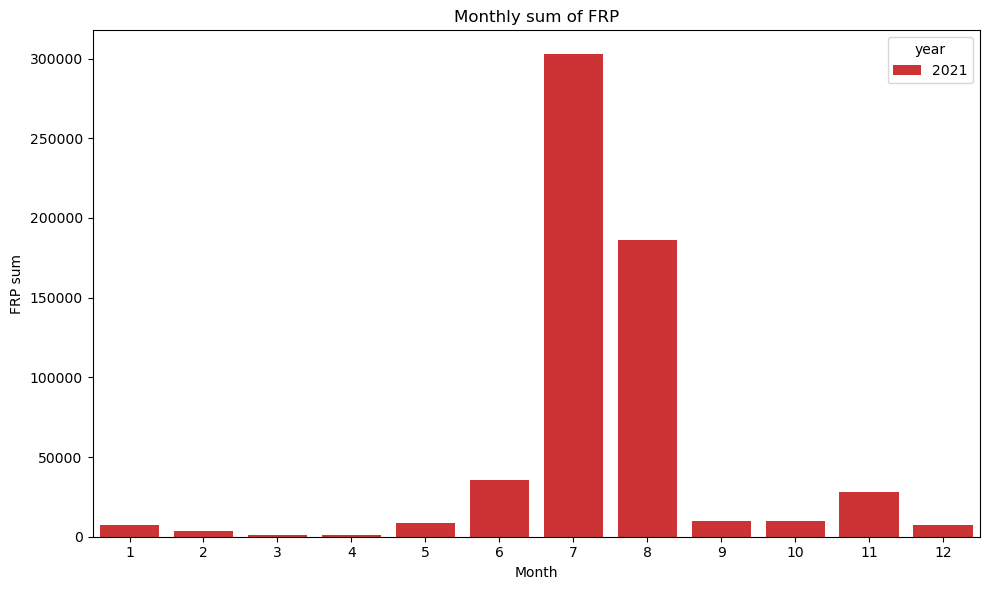

In [48]:
import seaborn as sns

FRP_sum = df_Global_fire.groupby(['year','month'])['frp'].sum().reset_index()

#Se crea una figura y ejes para el gráfico de barras
plt.figure(figsize=(10, 6))

#Se crea el gráfico de barras
sns.barplot(data=FRP_sum, x='month', y='frp', hue='year', palette='Set1')

#se personaliza el título y etiquetas de los ejes
plt.title('Monthly sum of FRP')
plt.xlabel('Month')
plt.ylabel('FRP sum')


#Se muestra el gráfico de barras
plt.tight_layout()
plt.show()